Classified Students:
    visual_score  auditory_score  kinesthetic_score predicted_learning_style
0       8.000301        1.389837           9.686887              kinesthetic
1       8.401052        7.294055           4.853655                   visual
2       9.124874        3.975049           6.688173                   visual
3       5.724100        7.702631           7.535001                 auditory
4       5.060739        4.711628           4.302653                   visual
..           ...             ...                ...                      ...
95      3.021422        2.362341           2.190592                   visual
96      1.622382        2.366976           9.798310              kinesthetic
97      8.447489        3.957023           6.243658                   visual
98      3.290865        1.490194           9.959267              kinesthetic
99      5.257248        2.642122           9.203633              kinesthetic

[100 rows x 4 columns]

Number of Students by Learning

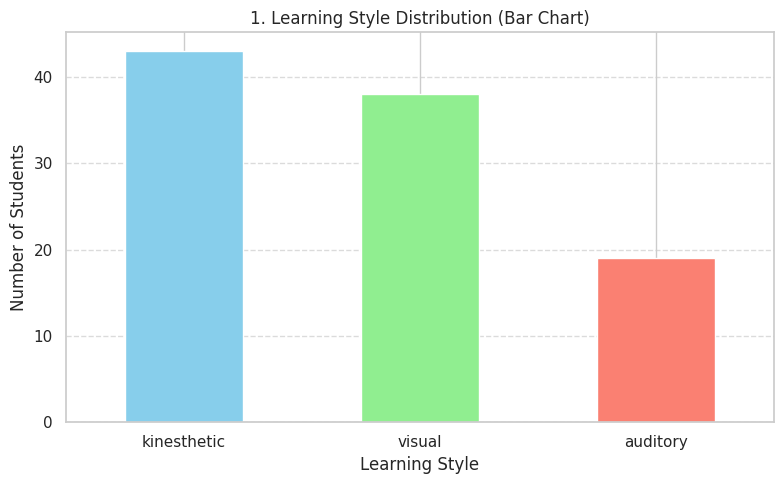

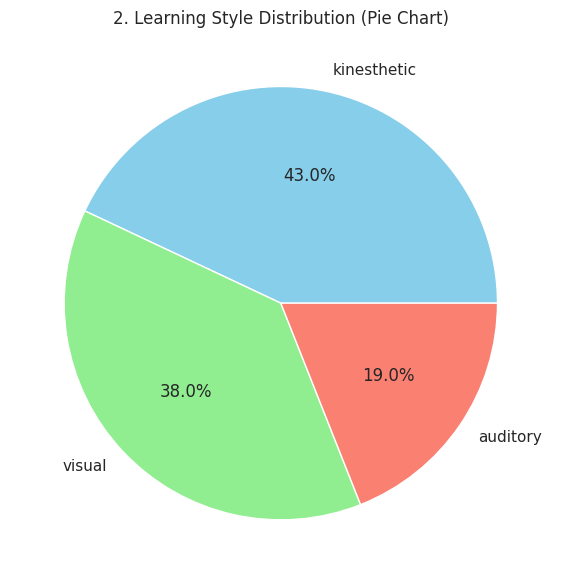

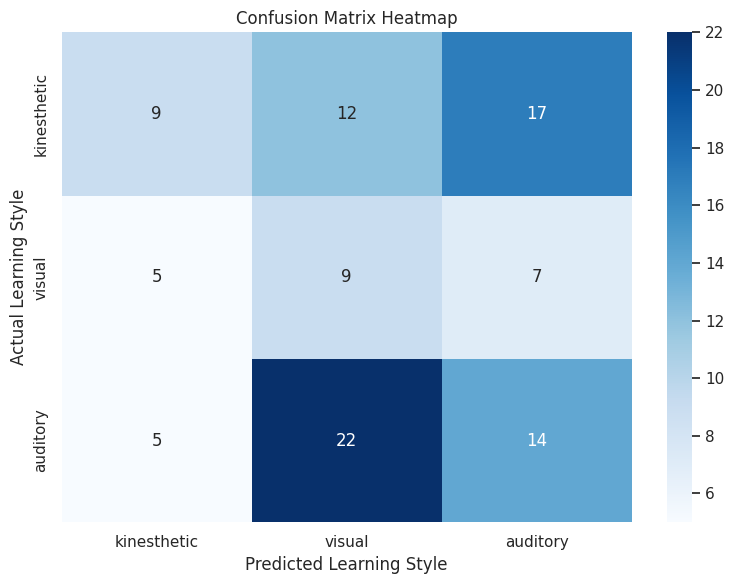


Evaluation Metrics:
Accuracy: 0.32
Precision (Weighted): 0.38
Recall (Weighted): 0.32


In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Load the CSV
df = pd.read_csv('student_methods.csv')

# Define function to determine dominant learning style
def determine_learning_style(row):
    scores = {
        'visual': row['visual_score'],
        'auditory': row['auditory_score'],
        'kinesthetic': row['kinesthetic_score']
    }
    return max(scores, key=scores.get)

# Apply classification
df['predicted_learning_style'] = df.apply(determine_learning_style, axis=1)

# Display classification result
print("Classified Students:")
print(df[['visual_score', 'auditory_score', 'kinesthetic_score', 'predicted_learning_style']])

# Count of each learning style
style_counts = df['predicted_learning_style'].value_counts()
print("\nNumber of Students by Learning Style:")
print(style_counts)

# Set style for plots
sns.set(style="whitegrid")

# 1. Bar Chart
plt.figure(figsize=(8, 5))
style_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('1. Learning Style Distribution (Bar Chart)')
plt.xlabel('Learning Style')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Pie Chart
plt.figure(figsize=(6, 6))
style_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('2. Learning Style Distribution (Pie Chart)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Confusion Matrix and Evaluation Metrics
# Assuming 'predicted_learning_style' is the prediction and 'learning_style' is the actual value
cm = confusion_matrix(df['learning_style'], df['predicted_learning_style'])
accuracy = accuracy_score(df['learning_style'], df['predicted_learning_style'])
precision = precision_score(df['learning_style'], df['predicted_learning_style'], average='weighted')
recall = recall_score(df['learning_style'], df['predicted_learning_style'], average='weighted')

# Display Confusion Matrix with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=style_counts.index, yticklabels=style_counts.index)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Learning Style')
plt.ylabel('Actual Learning Style')
plt.tight_layout()
plt.show()

# Print Evaluation Metrics
print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")

# Clustering (KMeans) for Segmentation
X = df[['visual_score', 'auditory_score', 'kinesthetic_score']]

# Use PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# (Removed) Box Plot, Pair Plot, and Swarm Plot
